# COMP60711 - Part 2 Coursework 1

|                           |                                                                                                                                                                               |
|--------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|              Course Unit: | COMP60711: Data Engineering                                                                                                                                                   |
| Responsible Staff Member: | Professor John Keane                                                                                                                                                          |
|                    Marks: | This course is worth **25%** of the overall marks for this unit.                                                                                                                |
|              Submissions: | This is the **3rd** of **4** assessed submissions.                                                                                                                                    |
|     Method of Submitting: | This notebook, after completion, should be saved as a HTML document and submitted using Blackboard                                                                                      |
|                 Deadline: | Thursday 26th November 9AM (UK time)                                                                                                                                                                            |
|         Late Submissions: | Extensions will only be granted as a result of formally processed [Mitigating Circumstances](http://documents.manchester.ac.uk/DocuInfo.aspx?DocID=427). Marks for late submissions will be reduced in line with the [University policy](http://documents.manchester.ac.uk/display.aspx?DocID=24561). |

Please complete the questions in the spaces provided (under the "Answer" block for each question), then download the notebook in HTML format and submit to Blackboard.

Please also add your student ID and name below.

| Student ID (7-8 digit number) | Full Name |
|:-------------------------------:|:-----------:|
|       10647902                  |  Yue Zhang         |

## Reminders
* Jupyter notebooks use markdown. A brief summary of how to use markdown can be seen [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). Otherwise, please refer to the brief guide on Blackboard.
* You **must** cite any sources used, from web pages to academic papers and textbooks.
* Please ensure your code has no errors, and that the output is shown in your submitted version.
* We have added some general notebooks on Blackboard to cover the basics of plotting in Python, Jupyter notebooks, and anaconda.
* Some questions require a mixture of code and text to answer the question. Marks are awarded based on the output of your code (i.e. graphs) and the explanation provided, not on the code itself.

# Question 1: Clustering (16 marks)

The following sub-questions are about [clustering](https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf). In general, the topics covered are as follows:
* Question 1.1 focuses on clustering algorithmic behaviour, and their sensitivity to data.
* Question 1.2 focuses on method for estimating the number of clusters.
* Question 1.3 uses a large real-world dataset to look at how clustering can be used for knowledge discovery.

The following reading is likely to be of use for the following questions:
1. Book chapter on clustering: https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf
    * Note that certain sections may be useful, you are not expected to read it all!
2. Here is an example of running KMeans using scikit-learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

For this question, we will use multiple datasets, which can all be found on Blackboard. To load these datasets in, we can use the following code. Note that you may need to adjust the path to the dataset, depending on where they are located on your system.

In [1]:
import pandas as pd

def load_dataset(file_name, **kwargs):
    try:
        data = pd.read_csv(file_name, **kwargs)
    except FileNotFoundError:
        raise FileNotFoundError(f"Cannot find {file_name}, please either place the file in the same directory as this notebook, or provide the full path")
    labels = data.values[:, -1]
    data = data.values[:, :-1]
    return data, labels

# This loads the dataset used in Q1.1a
simple_data, simple_labels = load_dataset("simple.csv")

## Q1.1 (6 marks)

### Q1.1a (2 marks)
Using `simple.csv`, run the K-Means and single-linkage algorithms (available in [`scikit-learn`](https://scikit-learn.org/stable/modules/clustering.html)) on the dataset, using the true number of clusters ($K=5$). Produce a graph (e.g. bar chart) showing the performance (measured using the [adjusted rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)) across 10 independent runs. Discuss the results obtained, using your knowledge of how the algorithms work to explain why the behaviour observed occurred.

**Hints:**
* This question is more difficult without the use of error bars!
* For single-linkage, use `AgglomerativeClustering(n_clusters=5, linkage="single")`
* For KMeans, use `KMeans(n_clusters=5, init="random", n_init=1)` as arguments.

### Q1.1a Answer

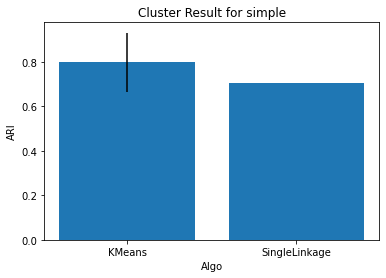

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np

kmeans_aris_simple = []
single_linkage_aris_simple = []

# run 10 times for 10 independent runs
for i in range(10):
    # we only select centroid once, which is easier to observe.
    kmeans = KMeans(n_clusters=5, init="random", n_init=1).fit(simple_data)
    single_linkage = AgglomerativeClustering(linkage="single", n_clusters=5).fit(simple_data)

    kmeans_aris_simple.append(adjusted_rand_score(simple_labels, kmeans.labels_))
    single_linkage_aris_simple.append(adjusted_rand_score(simple_labels, single_linkage.labels_))

plt.title("Cluster Result for simple")
plt.xlabel("Algo")
plt.ylabel("ARI")
plt.bar(x=['KMeans', 'SingleLinkage'], height=[np.mean(kmeans_aris_simple), np.mean(single_linkage_aris_simple)], yerr=[np.std(kmeans_aris_simple), np.std(single_linkage_aris_simple)])
plt.show()

As you can see in this picture, the ARI of kmeans is slightly less than 0.8, which fluctuates from 0.6 to 1.0, while the ARI of single-linkage is stable, around 0.7.

### We can visualize the dataset for observation.

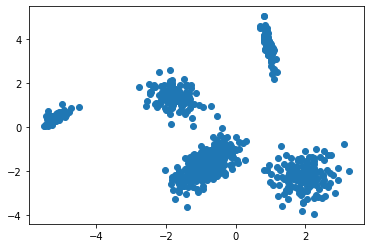

In [3]:
plt.scatter(list(map(lambda x: x[0], simple_data)), list(map(lambda x: x[1], simple_data)))

plt.show()

In this dataset, it can be seen that the data is spherical（In 2D, is circular）, which is easy to find the centroid and the centroid is inside the cluster.
<br>
K-means is an algorithm for classification by centroids. In this question, the performance of k-means is unstable(use `n_init=1` to make sure it only executes once). Because the initial selection of the centroid is random, so the results are not stable, and two clusters may share the same centroid. In this situation, the ARI of k-means will drop because a cluster will be treated as two.
<br>
single-linkage count each object as one cluster and then merge the two closest cluster. The closest here is equal to the minimum distance between two types of objects. In this dataset, two of the five clusters are relatively close, so the ARI may not be very high, but it is stable, cause there is no random factor here.

### Q1.1b (2 marks)

Using the dataset named `q1-1b.csv`, perform the same experiment as in Q1.1a. Discuss the ARI results obtained, particularly how and why the results are different from Q1.1a.

**Hint:**
* Visualizing the data itself may help to support your discussion.

### Q1.1b Answer

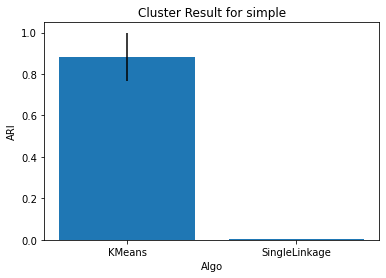

In [4]:
q1b_data, q1b_labels = load_dataset("q1-1b.csv")

kmeans_aris_q1b = []
single_linkage_aris_q1b = []

# run 10 times for 10 independent runs
for i in range(10):
    kmeans = KMeans(n_clusters=5, init="random", n_init=1).fit(q1b_data)
    single_linkage = AgglomerativeClustering(linkage="single", n_clusters=5).fit(q1b_data)

    kmeans_aris_q1b.append(adjusted_rand_score(q1b_labels, kmeans.labels_))
    single_linkage_aris_q1b.append(adjusted_rand_score(q1b_labels, single_linkage.labels_))
    
plt.title("Cluster Result for simple")
plt.xlabel("Algo")
plt.ylabel("ARI")
plt.bar(x=['KMeans', 'SingleLinkage'], height=[np.mean(kmeans_aris_q1b), np.mean(single_linkage_aris_q1b)], yerr=[np.std(kmeans_aris_q1b), np.std(single_linkage_aris_q1b)])
plt.show()

As you can see in this picture, the ARI of kmeans is around 0.8, which fluctuates from 0.6 to 1.0, while the ARI of single-linkage is stable, around 0.

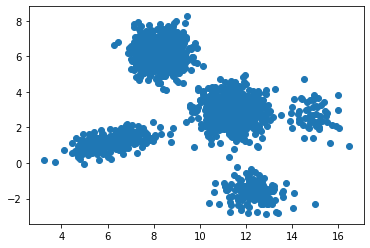

In [5]:
# visualize data of q1.1b
plt.scatter(list(map(lambda x: x[0], q1b_data)), list(map(lambda x: x[1], q1b_data)))

plt.show()

In this dataset, data is also spherical（In 2D, is circular）, which is easy to find the centroid. Besides, the centroid is in the cluster, not out the cluster. Therefore, the k-means algorithm still performs well.
<br>
However, because the distance between the two clusters is very close, the single-linkage recognizes them as one cluster, and therefore the ARI drops to 0.

### Q1.1c (2 marks)

Using the dataset named `q1-1c.csv`, perform the same experiment as in Q1.1b. Discuss the results obtained, particularly how and why the results are different from Q1.1b.

**Hints:**
* Visualizing the data itself may help to support your discussion.

### Q1.1c Answer

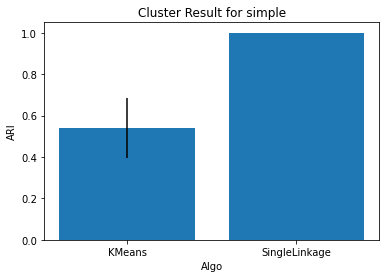

In [6]:
q1c_data, q1c_labels = load_dataset("q1-1c.csv")

kmeans_aris_q1c = []
single_linkage_aris_q1c = []

# run 10 times for 10 independent runs
for i in range(10):
    kmeans = KMeans(n_clusters=5, init="random", n_init=1).fit(q1c_data)
    single_linkage = AgglomerativeClustering(linkage="single", n_clusters=5).fit(q1c_data)

    kmeans_aris_q1c.append(adjusted_rand_score(q1c_labels, kmeans.labels_))
    single_linkage_aris_q1c.append(adjusted_rand_score(q1c_labels, single_linkage.labels_))
    
plt.title("Cluster Result for simple")
plt.xlabel("Algo")
plt.ylabel("ARI")
plt.bar(x=['KMeans', 'SingleLinkage'], height=[np.mean(kmeans_aris_q1c), np.mean(single_linkage_aris_q1c)], yerr=[np.std(kmeans_aris_q1c), np.std(single_linkage_aris_q1c)])
plt.show()

As you can see in this picture, the ARI of kmeans is slightly less than 0.6, which fluctuates from 0.3 to 0.8, while the ARI of single-linkage is stable, around 1.0.

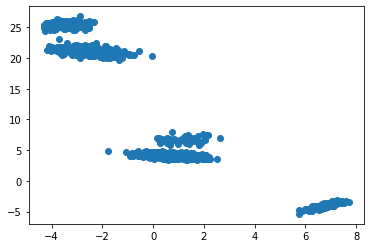

In [7]:
plt.scatter(list(map(lambda x: x[0], q1c_data)), list(map(lambda x: x[1], q1c_data)))

plt.show()

In this dataset, the data is non-spherical, so the ARI of k-means is lower than the single-linkage.
<br />
As you can see, the distance between clusters is colse, so it is hard for kmeans to get centroid. <br />
However, the single-linkage algorithm performs well because the internal points of each cluster are very close compared to the distance between the clusters( Although they are very close to each other).

## Q1.2 (5 marks)

### Q1.2a (3 marks)
Discuss **two** methods that can be used to estimate the *true* number of clusters. A discussion of the suitability and potential issues with each method is expected. No marks are given beyond the first two methods.

The **Elbow Method** and The **Silhouette Method**.
* The Elbow Method:
The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.  -- [wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering))<br />
    The function is as follows:
$$D_k = \sum_{i=1}^{K}{\sum {dist(x,c_i)^2}}$$
  $c_i$ is ith cluster, $p$ is the sample point in $c_i$ and $x$ is the centroid of $c_i$ (the mean of all samples in $c_i$.)<br/>
  As the number of clusters k increases, the sample division will be more refined, and the degree of aggregation of each cluster will gradually increase, so the $D_k$ will naturally gradually become smaller.<br />When k < true number of clusters, since the increase of k will greatly increase the degree of aggregation of each cluster, $D_k$ will decrease greatly.<br /> When k = the number of true clusters, the degree of aggregation obtained by k is increased. The return will decrease rapidly, so the decline of $D_k$ will decrease sharply, and then it will be flat as the value of k continues to increase. <br />
    **Suitability**: data have an 'elbow.'<br />
    **Potential issues**: It depends on data. Some clustering issues may not cause elbows to form and may cause the graph to continuously decrease, making it difficult to select the K value. In this case, we can use other methods.
    
    
* The Silhouette Method:
Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. -- [wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering))<br />
The method use [silhouette coefficient](https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf)
$$s_i = \frac {(b_i - a_i)} { max(a_i, b_i)}$$
to determine, choose the value of k that makes the coefficient larger. The silhouette coefficient range is between [-1,1]. The larger the value, the more reasonable. <br />When it is close to 1, it means that the sample clustering is reasonable.<br /> When it close to -1, it means that the sample should be classified into another cluster.<br /> When it approximately 0, it means that the sample i is on the boundary of the two clusters.<br />
**Suitability**: data that not very large.<br />
**Potential issues**: The time complexity is $O(n^2)$, and the distance matrix needs to be calculated. Then, when the amount of data reaches millions or even tens of millions, the calculation overhead will be huge.

### Q1.2a Answer

### Q1.2b (2 marks)

Using the `simple.csv` dataset, apply one of the two methods discussed in Q1.2a to estimate the true number of clusters. Was the estimate correct? Discuss your result.

### Q1.2b Answer

I choose Elbow Method to solve this problem. <br />
The k in k-means is also the number of clusters, and I choose k-means to find k.
<br />First, we will get the length of the data.

In [8]:
len(simple_labels)

748

We can see that the number of data is 748.<br />
I use `n_init=50` to get the best results.
We set the stepsize = 100, and try to find the interval where K can take the largest value.

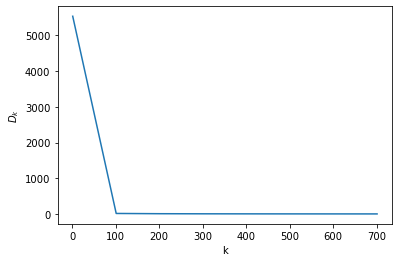

In [9]:
D_k = []  
for k in range(1, 749, 100):
    kmeans = KMeans(n_clusters=k, init="random", n_init=50).fit(simple_data) 
    D_k.append(kmeans.inertia_) # estimator.inertia_ represents the sum of the cluster centers closest to the sample

plt.xlabel('k')
plt.ylabel('$D_k$')
plt.errorbar(range(1, 749, 100), D_k)
plt.show()

we can see that the elbow is near the 100, so we change the interval to (1, 110), and stepsize = 10.

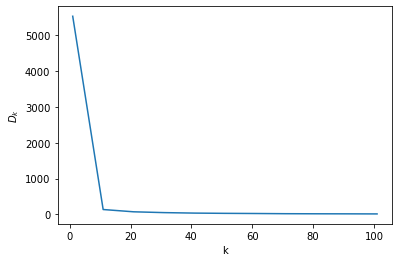

In [10]:
D_k = []  
for k in range(1, 110, 10):
    kmeans = KMeans(n_clusters=k, init="random", n_init=50).fit(simple_data) 
    D_k.append(kmeans.inertia_) # estimator.inertia_ represents the sum of the cluster centers closest to the sample

plt.xlabel('k')
plt.ylabel('$D_k$')
plt.errorbar(range(1, 110, 10), D_k)
plt.show()

we can see that the elbow is near the 10, so we change the interval to (1, 20), and stepsize = 1.

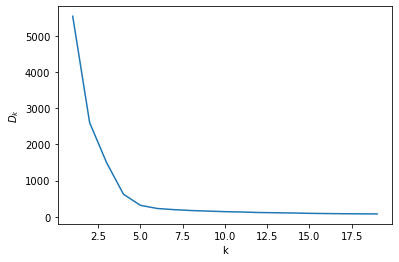

In [11]:
D_k = []  
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init="random", n_init=50).fit(simple_data) 
    D_k.append(kmeans.inertia_) # estimator.inertia_ represents the sum of the cluster centers closest to the sample

plt.xlabel('k')
plt.ylabel('$D_k$')
plt.errorbar(range(1, 20), D_k)
plt.show()

we can see that the elbow is near the 5, so we change the interval to (2, 7), and stepsize = 1.

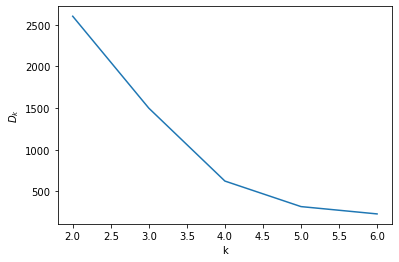

In [12]:
D_k = []  
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init="random", n_init=50).fit(simple_data) 
    D_k.append(kmeans.inertia_) # estimator.inertia_ represents the sum of the cluster centers closest to the sample

plt.xlabel('k')
plt.ylabel('$D_k$')
plt.errorbar(range(2, 7), D_k)
plt.show()

We get 4 here, so use the Elbow Method to estimate, the answer is 4. Unfortunately, it is incorrect, since we know the answer is 5.(I know I should pretend not to know, but I want to optimize the results.)<br />
However, 5 is also an elbow, and maybe we can use the Silhouette Method to see which one is bigger.<br />
We can use [sklearn.metrics.silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) to get the silhouette coefficient.

In [13]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, init="random", n_init=50).fit(simple_data)
silhouette_4 = silhouette_score(simple_data, kmeans.labels_)
kmeans = KMeans(n_clusters=5, init="random", n_init=50).fit(simple_data)
silhouette_5 = silhouette_score(simple_data, kmeans.labels_)

print("k = 4, the silhouette coefficient is:" + str(silhouette_4))
print("k = 5, the silhouette coefficient is:" + str(silhouette_5))

k = 4, the silhouette coefficient is:0.6906886240290357
k = 5, the silhouette coefficient is:0.7325759710267562


We can see that when k = 5, the silhouette coefficient is bigger. Therefore the answer is 5. <br />
That means, we can use the Elbow Method to get approximate elbow and if there are more than one elbow, we use the silhouette coefficient to check which one is the true elbow. The reason why we do not use the Silhouette Method directly is the running time of this function will be very long.

## Q1.3 (5 marks)

For this question, we will use the `online_retail_full.csv` dataset, which is a real-world dataset of transactions for an online retail store. Full information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II). Here, we do not have true labels, and need to explore the data instead. This is a common scenario in practice, and will require you explore the data and use clustering (likely requiring multiple iterations and tweaks) to try to find patterns. 

We're going to investigate whether there are groups of customers, how they are similar, and what they may represent. For simplicity, we will start by using KMeans as our model, and we'll remove some of the columns from our input data. Use a range of $K$ values and whichever techniques in Q1.2 are useful to propose interesting $K$ value(s). Comment on the clusters that are produced in terms of the context of the data.

Hints:
* As this dataset has no truth, there is a lot of scope in this question - remember to have some justification for why you have taken the steps you have.
* The quality of your final clusters is not important for marks, as long as you have taken reasonable steps.
* The overall aim is to try to find patterns in the data. KMeans is suggested as a starting point, but it is not always the best algorithm to use as we have seen in previous questions. 
* You can create features from the existing ones. For example, the quantity and price can be multiplied to get a total amount (thus simplifying the data). Other features may require transformation before they can be used.

## Q1.3 Answer

### Attribute Information:

Invoice: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
<br>
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
<br>
Description: Product (item) name. Nominal.
<br>
Quantity: The quantities of each product (item) per transaction. Numeric.
<br>
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
<br>
UnitPrice: Unit price. Numeric. Product price per unit in sterling.
<br>
Customer ID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
<br>
Country: Country name. Nominal. The name of the country where a customer resides.

### Preprocessing : Deal with missing values and eliminate outliers

In [14]:
from sklearn import preprocessing
# import data
retail = pd.read_csv("online_retail_full.csv", index_col=False)

retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [15]:
# check the empty value
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


First, import data and get the **characteristics** of the data. 
<br>
Through the above data, We can get the size of the dataset is 1067371, and by viewing  Non-Null Counts, it can be seen that the feature 'Description' and the feature 'Customer ID' have a null value.
<br>
Then, we can check the number of null numbers.

In [16]:
# Calculate the null value of each attribute
retail.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

This time we are analyzing customers, so customers with **empty** id should be **deleted**. We can use dropna() to drop it.

In [17]:
# drop the empty value of Customer ID
retail = retail.dropna(subset=['Customer ID'])
print("The amount of null number is as follows.")
retail.info()

The amount of null number is as follows.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


Then, we **de-duplicate** data. We use drop_duplicates() to do it.

In [18]:
retail = retail.drop_duplicates()
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


It can be seen that we droped 824364 - 797885 = 26479 rows. 

Next, we will see if there are **outliers**.

In [19]:
retail.describe()

,Quantity,Price,Customer ID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


It can be seen that there are some negative values in the feature 'Quantity' and  zeros in the feature 'Price.' 
<br />
However, they are not outliers, when 'Quantity' is negative that means someone has returned the product.<br />
Meanwhile, zeros in 'Price' stands for the product is a gift.

### Preprocessing : Select the model and create feature models needed

Analyzing this data, from the perspective of the merchant, the merchant's goal is to generate as much profit as possible, so the product of the number of goods sold and the value of the goods should be as large as possible. Also, it is necessary to consider whether the customer will be lost, so it is necessary to observe the customer's last consumption time. If the last consumption time has passed for a long time, it means that the merchant may have lost the customer. The merchant can use some marketing methods to help to save customers. Besides, the higher the consumption frequency of customers, the more beneficial to the merchants, because these users may also gradually increase their consumption levels and purchase more expensive products.

### Therefore, I will use RFM model to solve this problem.

For merchants, **identifying the quality of customers** is very important. Because different companies have different customer groups, companies need to **identify their own group**. For example, some customers like to buy cheap things, and some customers like to buy high-quality things. We can divide customers into high-value, medium-value, and low-value customers (not necessarily three, referring to the establishment of a scoring system). **Merchants can adjust their product pricing and advertising strategies according to the purchase volume of each type of customer.**<br />

In order to analyze the purchasing power of customers, we can multiply the price by the quantity to get the **total price** of the product purchased by the customer at one time.
<br />

According to the **[RFM](https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp#:~:text=Recency%2C%20frequency%2C%20monetary%20value%20is,a%20customer%20makes%20a%20purchase)** model, we analyze from the following three indicators:
* Recency: How recently a customer has made a purchase
* Frequency: How often a customer makes a purchase
* Monetary Value: How much money a customer spends on purchases

Premise:
* Customers who have recently had transactions are more likely to have a second transaction than those who have not recently;
* Customers with higher transaction frequency are more likely to have secondary transactions than customers with lower transaction frequency;
* In the past, customers with a larger total transaction amount are more likely to have a second transaction than customers with a smaller total transaction amount.

**I first used the RFM model to obtain customer clusters by myself, and then use kmeans to obtain RFM cluster, and analyzed and compared the two methods.**

In [20]:
retail['total_price'] = retail['Price'] * retail['Quantity']

In [21]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


We found the Monetary Value, and then we will find the value of **Recency**.
<br />
Use the function datatime to process time and separate the year, month and day for our convenience, and create features for them.

In [22]:
from datetime import datetime
retail['Year'] = retail['InvoiceDate'].apply(lambda s : datetime.strptime(s, "%Y-%m-%d %H:%M:%S").year)
retail['Month'] = retail['InvoiceDate'].apply(lambda s : datetime.strptime(s, "%Y-%m-%d %H:%M:%S").month)
retail['Day'] = retail['InvoiceDate'].apply(lambda s : datetime.strptime(s, "%Y-%m-%d %H:%M:%S").day)
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%Y-%m-%d')
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_price,Year,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1


In [23]:
# check if there are new outliers.
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
 8   total_price  797885 non-null  float64       
 9   Year         797885 non-null  int64         
 10  Month        797885 non-null  int64         
 11  Day          797885 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 79.1+ MB


In [24]:
retail.describe()

,Quantity,Price,Customer ID,total_price,Year,Month,Day
count,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777,20.416465,2010.431108,7.411434,15.387388
std,191.670371,71.392549,1696.466663,313.518824,0.568904,3.424495,8.658264
min,-80995.000000,0.000000,12346.000000,-168469.600000,2009.000000,1.000000,1.000000
25%,2.000000,1.250000,13964.000000,4.350000,2010.000000,5.000000,8.000000
50%,5.000000,1.950000,15228.000000,11.700000,2010.000000,8.000000,15.000000
75%,12.000000,3.750000,16788.000000,19.500000,2011.000000,10.000000,23.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,2011.000000,12.000000,31.000000


In [25]:
print(retail['InvoiceDate'].max())
print(retail['InvoiceDate'].min())

2011-12-09 12:50:00
2009-12-01 07:45:00


For convenience, we delete the data later than Dec.2011.

In [26]:
retail = retail.loc[retail['InvoiceDate'] < '2011-12-01']
retail['InvoiceDate'].max()

Timestamp('2011-11-30 17:42:00')

Then, we get Recency by finding the customer's last purchase.

In [27]:
# Get the closest and furthest time of customer purchase.
Last_purchase=retail.groupby(['Customer ID'])['InvoiceDate'].max()
First_purchase=retail.groupby(['Customer ID'])['InvoiceDate'].min()
Last_purchase.head()

Customer ID
12346.0   2011-01-18 10:17:00
12347.0   2011-10-31 12:25:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [28]:
First_purchase.head()

Customer ID
12346.0   2009-12-14 08:34:00
12347.0   2010-10-31 14:20:00
12348.0   2010-09-27 14:59:00
12349.0   2009-12-04 12:49:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

We use days to measure Recency. Take the difference between the lastest time in all purchase records and the current user purchase time as Recency.

In [29]:
max_date = retail['InvoiceDate'].max()
max_date

Timestamp('2011-11-30 17:42:00')

We can use [pandas.core.groupby.DataFrameGroupBy.aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) to create the dataframe rfm.

In [30]:
rfm = retail.groupby(['Customer ID']).aggregate({'InvoiceDate':lambda x:(max_date - x.max()).days,
                                                'Invoice':'count',
                                                'total_price':'sum'})

rfm.rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','total_price':'Monetary'},inplace=True)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,316,47,-51.74
12347.0,30,211,4696.71
12348.0,66,51,2019.40
12349.0,9,180,4404.54
12350.0,301,17,334.40


The monetary < 0 is not considered as an abnormality, and a negative value means that more returns than purchases. Because we are counting the purchases over a period of time, it is very likely that the customer purchased the product before this time and returned it within the statistical time interval.<br />
We use rfm_original to save the rfm data we get for the final analysis.

In [31]:
rfm_original = retail.groupby(['Customer ID']).aggregate({'InvoiceDate':lambda x:(max_date - x.max()).days,
                                                'Invoice':'count',
                                                'total_price':'sum'})
rfm_original.rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','total_price':'Monetary'},inplace=True)

Because Recency, Frequency and Monetary are not in the same description dimension, we need to establish a scoring mechanism to keep them in the same latitude.<br />
The scoring method is based on the characteristics of each value of the three sets of data, and a 3-point system is used to assign a score to each data. The scoring mechanism of the Recency value is that the larger the Recency value, the smaller the score. Specific scoring rules can be based on experience to set the value of the interval, or evenly distribute the data into 3 groups, corresponding to 3 points.<br />
We preprocess the data first.

The values of these three data are very different, we should scale them to the interval of [1, 5], and we can use MinMaxScaler to scale the data to [1, 5]. 

In [32]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(1, 5))
rfm_minmax = min_max_scaler.fit_transform(rfm[1:])
rfm_minmax

array([[2.73388203, 1.01511542, 1.17163757],
       [1.16460905, 1.06900518, 1.20416086],
       [1.36213992, 1.0164298 , 1.18582331],
       ...,
       [4.57201646, 1.00361456, 1.17491658],
       [3.56241427, 1.02267313, 1.1801318 ],
       [1.18106996, 1.05093239, 1.20060734]])

In [33]:
# Adjust all numbers except customer Id between 1-5
rfm[1:] = rfm_minmax

In [34]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,2.733882,1.015115,1.171638
12347.0,1.164609,1.069005,1.204161
12348.0,1.362140,1.016430,1.185823
12349.0,1.049383,1.058819,1.202160
12350.0,2.651578,1.005258,1.174282


In [35]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5914 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5914 non-null   float64
 1   Frequency  5914 non-null   float64
 2   Monetary   5914 non-null   float64
dtypes: float64(3)
memory usage: 344.8 KB


## Build RFM model

Finally, the formula for calculating the total value of RFM is as follows: 

$$RFM = Recency  * (-1) + Frequency  + Monetary_Value$$

In the formula, in order to solve the problem that the R value is different from the statistical dimensions of the F and M values, the R value is multiplied by negative 1.

In [36]:
# create to get the score
def get_the_RFM_score(x):
    x['RFM_Score'] = (x[2:].sum() - x[1])
    return x
rfm = rfm.apply(get_the_RFM_score, axis=1)
rfm.head()

,Recency,Frequency,Monetary,RFM_Score
Customer ID,,,,
12346.0,2.733882,1.015115,1.171638,0.156522
12347.0,1.164609,1.069005,1.204161,0.135156
12348.0,1.362140,1.016430,1.185823,0.169394
12349.0,1.049383,1.058819,1.202160,0.143341
12350.0,2.651578,1.005258,1.174282,0.169025


This time, we use quartile divide RMF_score into 3 groups. <br />
We set the score which less than 1st quartile to 1, set the score which between 1st quartile and 3rd quartile to 2, and set the score which greater than 3rd quartile is 3. The larger the number, the more important the customer.<br />
Because at this time, we no longer pay attention to the specific score, but to focus on the position of the user in the total data.

In [37]:
first = rfm['RFM_Score'].quantile(0.25)
third = rfm['RFM_Score'].quantile(0.75)
def get_class(x):
    if x['RFM_Score'] < first:
        x['RFM_Score'] = 1
    elif x['RFM_Score'] > third:
        x['RFM_Score'] = 3
    else:
        x['RFM_Score'] = 2
    return x
rfm = rfm.apply(get_class, axis=1)
rfm.head()

,Recency,Frequency,Monetary,RFM_Score
Customer ID,,,,
12346.0,2.733882,1.015115,1.171638,2.0
12347.0,1.164609,1.069005,1.204161,1.0
12348.0,1.362140,1.016430,1.185823,3.0
12349.0,1.049383,1.058819,1.202160,1.0
12350.0,2.651578,1.005258,1.174282,2.0


In [38]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5914 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5914 non-null   float64
 1   Frequency  5914 non-null   float64
 2   Monetary   5914 non-null   float64
 3   RFM_Score  5914 non-null   float64
dtypes: float64(4)
memory usage: 391.0 KB


We will also add this feature to rfm_original for the final evaluation of kmeans.

In [39]:
rfm_original['RFM_Score'] = rfm['RFM_Score']
rfm_original.head()

,Recency,Frequency,Monetary,RFM_Score
Customer ID,,,,
12346.0,316,47,-51.74,2.0
12347.0,30,211,4696.71,1.0
12348.0,66,51,2019.40,3.0
12349.0,9,180,4404.54,1.0
12350.0,301,17,334.40,2.0


## Use kmeans model to mine valuable customers

We use kmeans to mine valued customers.<br />
Before applying the algorithm, we should make sure:
* The distribution of labels is symmetrical, not skewed.
* The average value of the labels is the same.
* The same variance of the labels.

Logarithmic transformation can be used to solve the symmetry problems. Meanwhile, the problem of obtaining the same mean and variance can be solved by standardization.

Therefore, we need to check the distribution of 'Recency,' 'Frequency' and 'Monetary.'

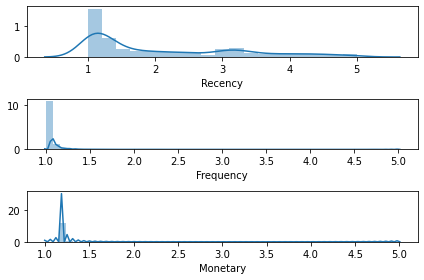

In [40]:
import seaborn as sns

plt.subplot(3, 1, 1); 
sns.distplot(rfm['Recency'], label = 'Recency')
plt.subplot(3, 1, 2); 
sns.distplot(rfm['Frequency'], label = 'Frequency')
plt.subplot(3, 1, 3); 
sns.distplot(rfm['Monetary'], label = 'Monetary')
plt.tight_layout()
plt.show()

It can be seen that the histograms of the three features are severely asymmetric, and the mean and variance are significantly different. Therefore, we need to transform them. 

First, logarithmic conversion.

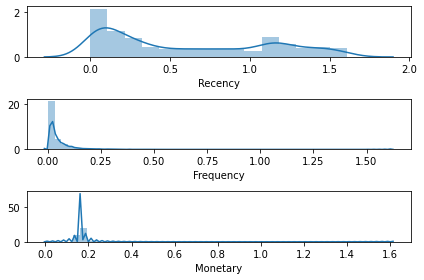

In [41]:
rfm_log  = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1)

plt.subplot(3, 1, 1); 
sns.distplot(rfm_log['Recency'], label = 'Recency')
plt.subplot(3, 1, 2); 
sns.distplot(rfm_log['Frequency'], label = 'Frequency')
plt.subplot(3, 1, 3); 
sns.distplot(rfm_log['Monetary'], label = 'Monetary')

plt.tight_layout()
plt.show()

By changing the horizontal and vertical coordinates, we can see that the data distribution is more even(The effect is not very good, but it will not make the result worse.). <br />
There is basically no data after 0.25 and 0.4 in Frequency and Monetary, which means that the data distribution has been improved and it is more symmetrical.

Second, standardization.

In [42]:
scaler = preprocessing.StandardScaler()
scaler.fit(rfm_log)
rfm_nor = scaler.transform(rfm_log)

rfm_nor

array([[ 0.78060386, -0.33404502, -0.30540796],
       [-0.87777505,  0.3880508 ,  0.27377412],
       [-0.57329905, -0.31598116, -0.05083287],
       ...,
       [ 1.77996399, -0.49310888, -0.24629058],
       [ 1.29505382, -0.23049559, -0.15260418],
       [-0.85049876,  0.15002329,  0.21125836]])

Third,estimate the best k.

I should do the same as I did in Q1.2b before, but my computer will run very slowly, so I use the Elbow method to select the value of k from 1-10.

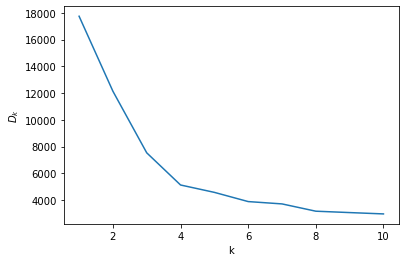

In [43]:
D_k = []  
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10).fit(rfm_nor) 
    D_k.append(kmeans.inertia_) # estimator.inertia_ represents the sum of the cluster centers closest to the sample

plt.xlabel('k')
plt.ylabel('$D_k$')
plt.errorbar(range(1, 11), D_k)
plt.show()

It can be seen that the best k is 3 or 4. I use the Silhouette Method to choose the better one.

In [44]:
kmeans = KMeans(n_clusters=3, init="random", n_init=10).fit(rfm_nor)
silhouette_3 = silhouette_score(rfm_nor, kmeans.labels_)
kmeans = KMeans(n_clusters=4, init="random", n_init=10).fit(rfm_nor)
silhouette_4 = silhouette_score(rfm_nor, kmeans.labels_)

print("k = 3, the silhouette coefficient is:" + str(silhouette_4))
print("k = 4, the silhouette coefficient is:" + str(silhouette_5))

k = 3, the silhouette coefficient is:0.5682457969279276
k = 4, the silhouette coefficient is:0.7325759710267562


Therefore, we pick k = 4 in kmeans and start to modeling. It is worth mentioning that here k = 4, which proves that there may be four types of clustering, that is, our behavior of dividing customers into three types may be unreasonable. Set random state=9 to ensure that the result is the same every time.

In [45]:
kmeans = KMeans(n_clusters=4, init="random", n_init=10, random_state=9).fit(rfm_nor)

result = kmeans.labels_

In [46]:
result

array([2, 0, 0, ..., 2, 2, 0])

## Analyze and evaluate the model

In [47]:
rfm_original['k'] = result

#Calculate average RFM values and sizes for each cluster
rfm_original.groupby('k').aggregate({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']})

Recency    Frequency       Monetary      
         mean         mean           mean count
k                                              
0   51.655239   107.726714    1922.253933  3092
1   29.512438   687.233831   13206.648296   402
2  421.734499    43.400333     664.585661  2403
3    4.529412  3932.470588  182279.572941    17

Analyzing the above data, we mentioned before that the smaller the Recency, the greater the value of the customer, and the greater the Frequency and Monetary, the greater the value of the customer. Therefore, we can see here that the most valuable users are the group of k=2. 
<br />
However, there are too few customers with **k = 3**, so we can also take **k = 1** into consideration.

In [48]:
rfm_original.head()

,Recency,Frequency,Monetary,RFM_Score,k
Customer ID,,,,,
12346.0,316,47,-51.74,2.0,2
12347.0,30,211,4696.71,1.0,0
12348.0,66,51,2019.40,3.0,0
12349.0,9,180,4404.54,1.0,0
12350.0,301,17,334.40,2.0,2


Again, the monetary < 0 is not considered as an abnormality, a negative value means that more returns than purchases. Because we are counting the purchases over a period of time. It is very likely that the customer purchased the product before this time and returned it within the statistical time interval.<br />

We first look at the effect of the groups we divide manually.

In [49]:
rfm_original.groupby('RFM_Score').aggregate({'Recency':['mean'],'Frequency':['mean'],'Monetary':['mean']}).round(1)

,Recency,Frequency,Monetary
,mean,mean,mean
RFM_Score,,,
1.0,80.4,373.9,4877.4
2.0,217.0,58.0,1055.4
3.0,287.2,37.9,3796.5


It can be seen that for value customers, the average recent consumption is 80.4 days, the average shopping frequency is 373.9 times, and the average spend is 4877.4 pounds.

After that, we look at the results of kmeans.

In [50]:
rfm_original.groupby('k').aggregate({'Recency':['mean'],'Frequency':['mean'],'Monetary':['mean']}).round(1)

,Recency,Frequency,Monetary
,mean,mean,mean
k,,,
0,51.7,107.7,1922.3
1,29.5,687.2,13206.6
2,421.7,43.4,664.6
3,4.5,3932.5,182279.6


It can be seen that for value customers(k = 3), the average recent consumption is 4.5 days, the average shopping frequency is 3932.5 times, and the average spend is 182279.6 pounds. The effect is much better than the effect of artificially defining RFM. For data with k = 1, the average recent consumption is 29.5 days, the average shopping frequency is 687.2 times, and the average spend is 13206.6 pounds.

View the contribution of cluster customers.

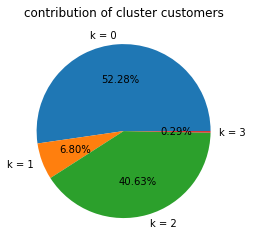

In [51]:
%matplotlib inline
customer = rfm_original.groupby('k').count()['Recency']

labels = ['k = 0','k = 1','k = 2', 'k = 3']
plt.pie(x=customer.values, labels=labels, autopct='%3.2f%%')

plt.title('contribution of cluster customers')
plt.show()

Then, view the the contribution of different cluster customers to total sales

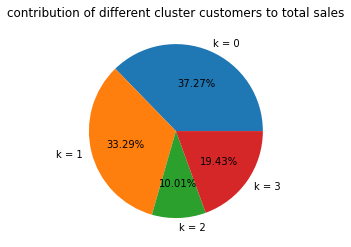

In [52]:
%matplotlib inline
customer = rfm_original.groupby('k').sum()['Monetary']

labels = ['k = 0','k = 1','k = 2', 'k = 3']
plt.pie(x=customer.values, labels=labels, autopct='%3.2f%%')

plt.title('contribution of different cluster customers to total sales')
plt.show()


The value customers identified as k = 3 accounted for only 0.29% but accounted for 19.43% of sales. This is the focus of business development. Besides, the customers k = 1 accounted for only 6.80%, but accounted for 33.29% of sales, is also very valuable.<br />

From all above, it can be seen that customers with k = 3 buy things very frequently and spend much money in total. For business people, these customers are the most important, and they should be served first when energy is limited. For customers with k = 1, merchants should pay the same attention.They can regularly launch advertisements to increase activities to ensure that customers do not lose. Customers with k = 0 may be the most regular customers. Their consumption frequency is not very high, and the amount of money is not particularly large, but it is the largest proportion of customers. Furthermore, for k = 2, through the Recency indicator, we can know that they should actually be lost customers, and businesses can re-attract them through some activities(Sale for old customers only and so on).

However, my cluster has its own **limitations**. For example, in the cluster of k=2, I did not distinguish a group with high consumption but no consumption for a long time. The cluster can be more detailed. According to kmeans, I have only four clusters, but the reality may not be only these four.

To improve this model, we can continue to adjust the value of k or change other algorithms to obtain a better cluster. Furthermore, perhaps we can add nationality for analysis to obtain better results.

# Question 2: Itemset Rule Mining (4 marks) 

For this question, we will be using a [real-world dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) which gives the votes of 435 U.S. congressmen on 16 key issues gathered in the mid-1980s, and also includes their party affiliation as a binary attribute. This is a purely nominal dataset with some missing values (corresponding to abstentions). It is normally treated as a classification problem, the task being to predict party affiliation based on voting patterns. However, association-rule mining can also be applied to this data to seek interesting associations.

We will be using [Weka](https://www.cs.waikato.ac.nz/ml/weka/), both for its utility for itemset rule mining, and to use a different approach for exploring data. You should have some experience using Weka from the first (non-assessed) week.

You may need to take screenshots of Weka and include them in your answer below, or copy & paste the relevant rules. Please ensure that your answer and rules are clearly legible.

## Q2.1 (3 marks)

In Weka, run `Apriori` on this dataset using default settings. Comment on any patterns you see in the rules that are generated. Also discuss their support, confidence, and lift, demonstrating that you understand how they are calculated, their role, and how to interpret these values.

## Q2.1 Answer

WEKA's own dataset vote is the dataset we need to analyze.

I have installed weka before, so I won’t describe the installation process anymore.<br>
### The first step here is to open the dataset.
* Click Explorer here
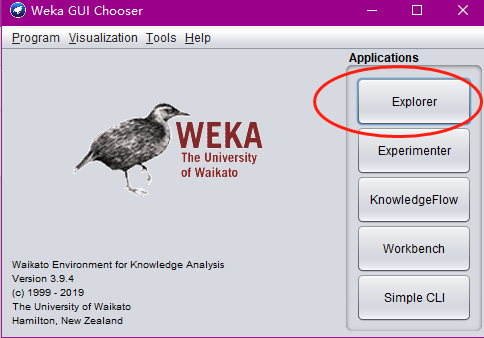
* Click open file here
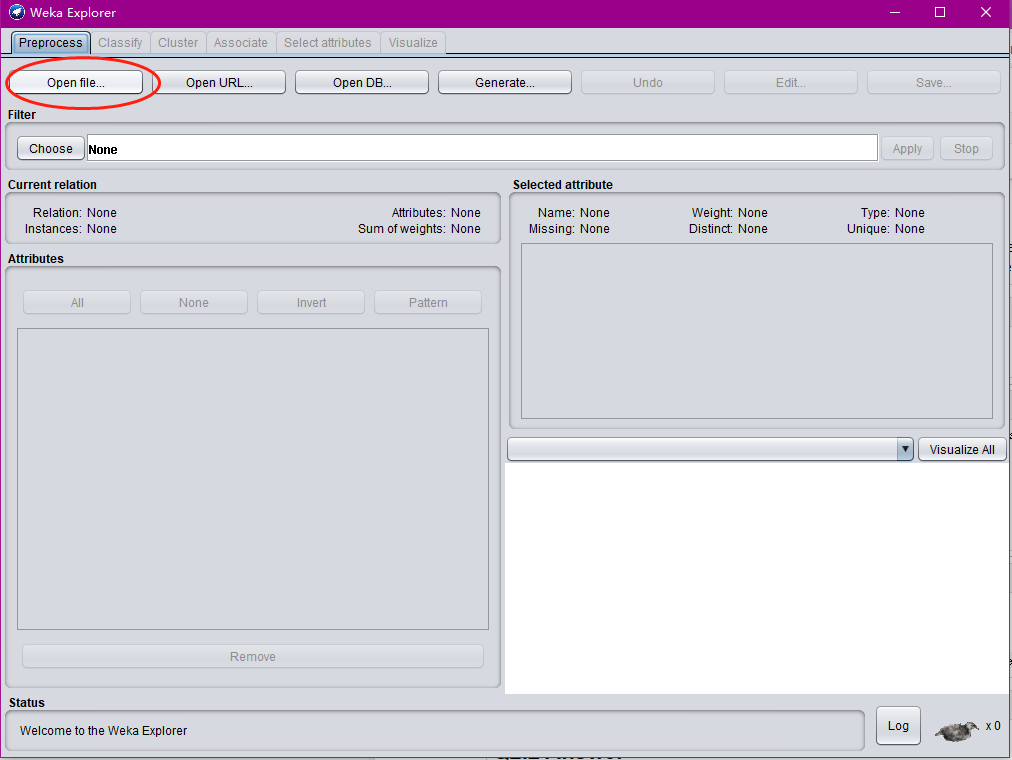
* Select the dataset we need. However, we cannot deal with them directly, so we need to preprocess them.
Right-click .names file, and open it with Notepad3 (Sorry for my language in my operating system, and I translate for you to read.)
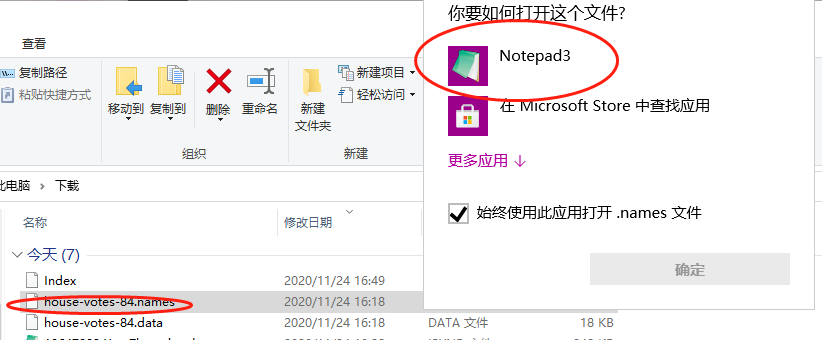<br />
Then, copy the name of this attribute into the .data file (Use Notepad3 to open.)<br />
Paste in the first line, separated by commas, as shown in the picture below.<br />
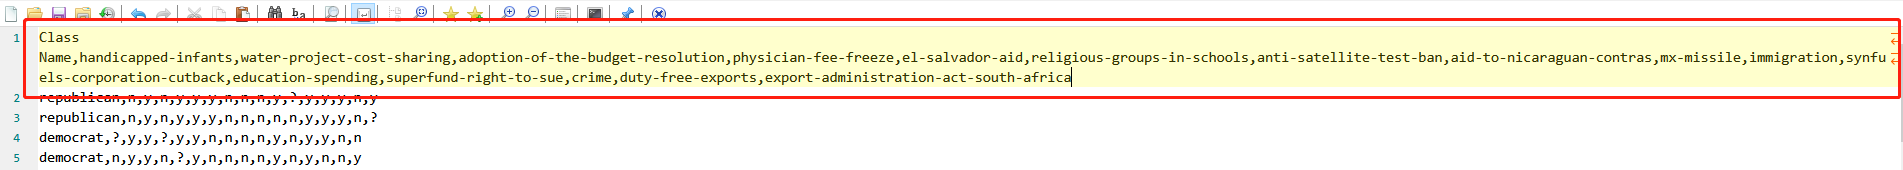<br />
Save it as an csv.<br />
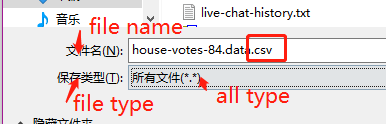<br />
The reason why we can do this is because the format of the .data file is the same as that of csv, which uses commas to separate. We actually just added the column names to them manually.<br />
Then, open it.
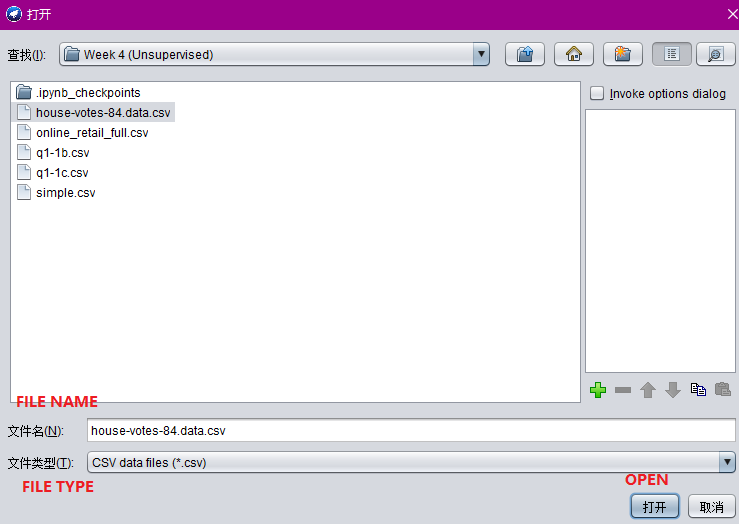
* Finally, we can check the attribute and the attribute value here
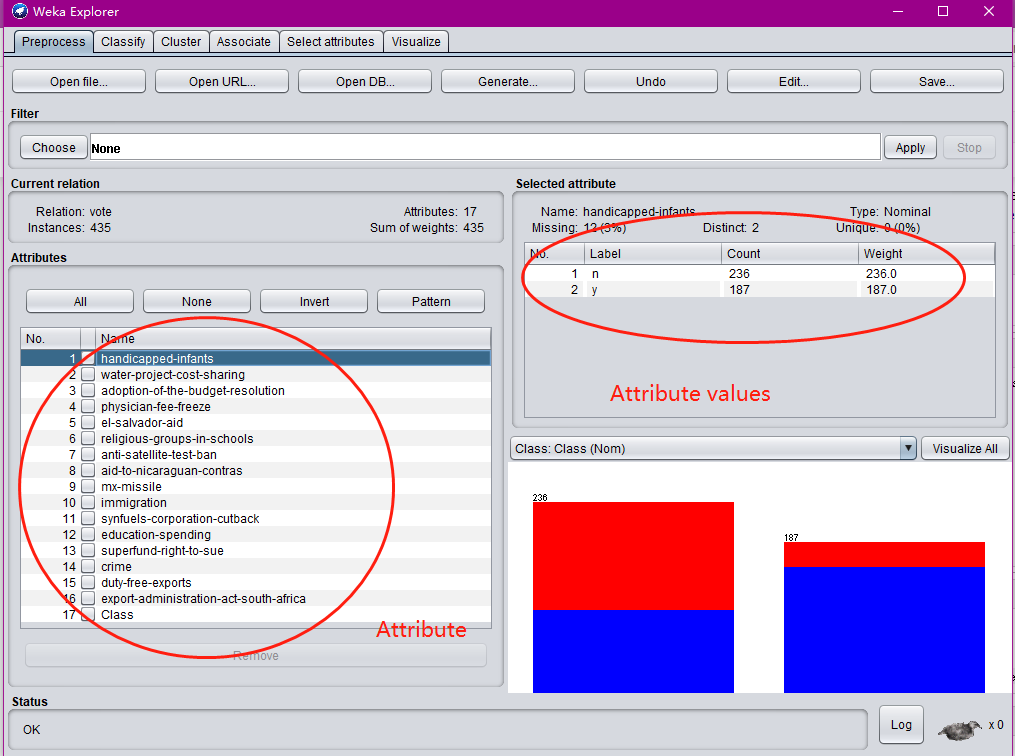

### The second step is to check the reasonableness of each data
Take Handicapped-infants as an example. From the figure below, we can see that there are 3% missing data. There are 187 people who choose y and 236 people who choose n. The data is reasonable.
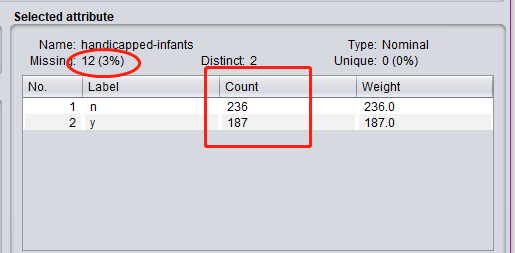
we can click visualize all to get all the relationship between feature and target(I select Class here.)
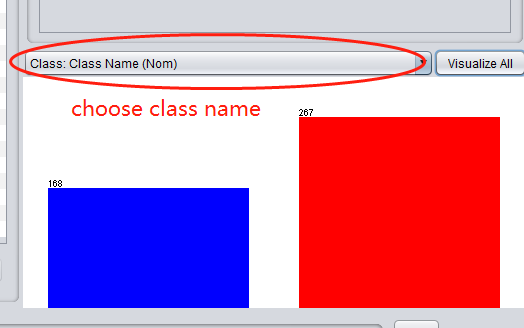
The result is as follows:
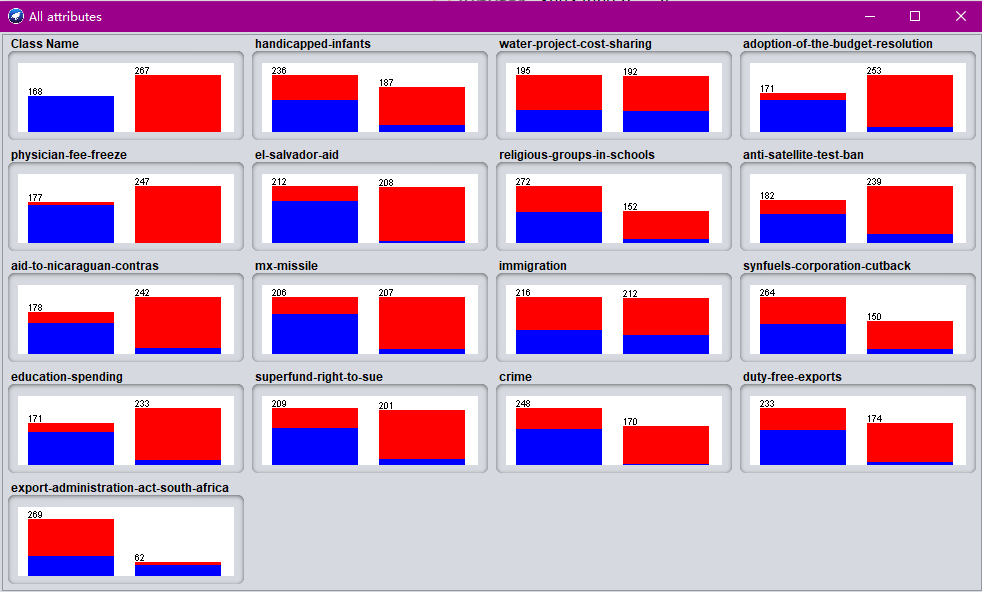
All the data is reasonable.

### The third step is to use Apriori on this dataset
Click Associate and choose Apriori.
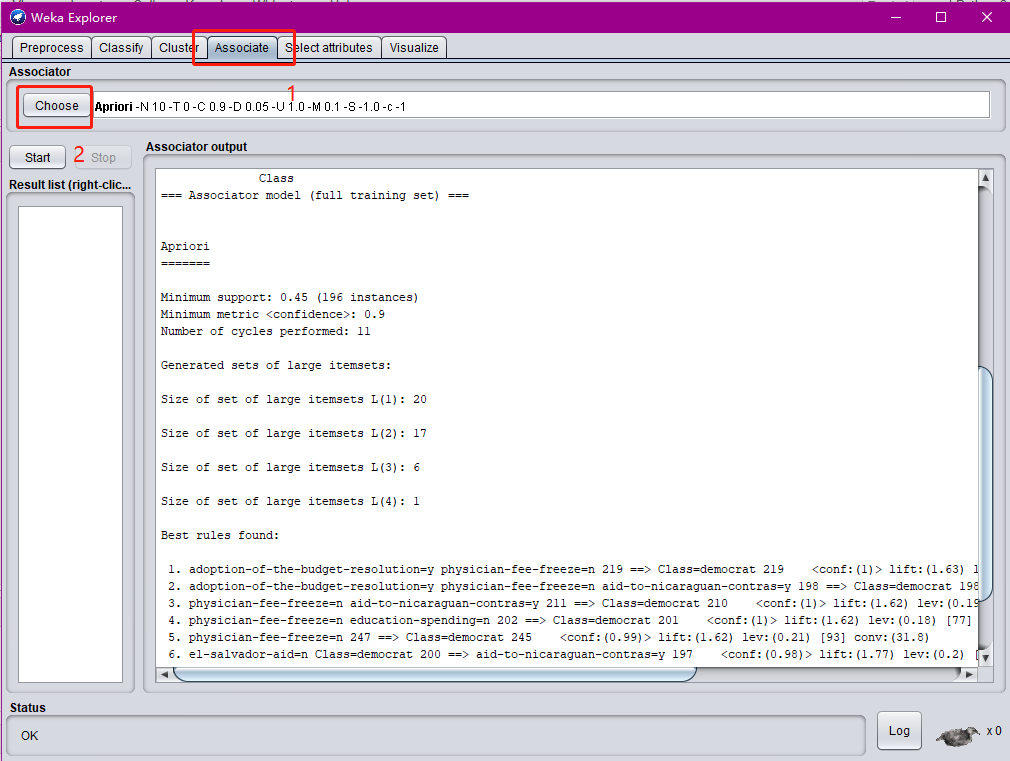
Then, adjust the parameters(I use the default value).
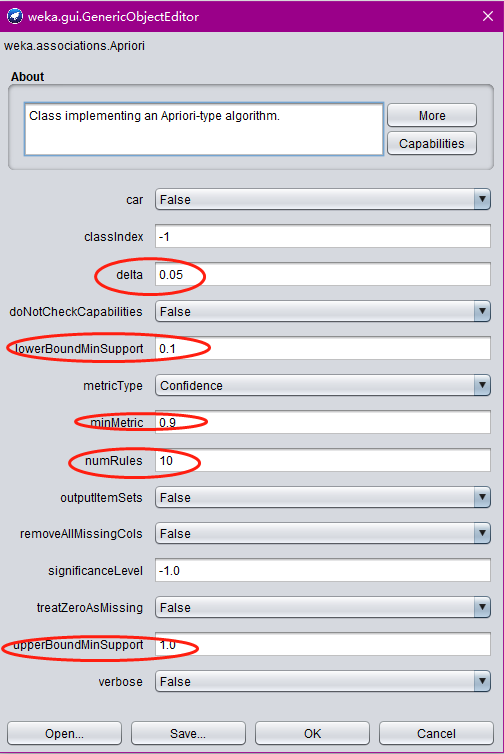
The result is as follows
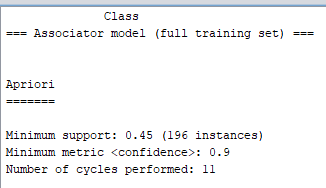
The 10 best rules found by Apriori algorithm are as follows:
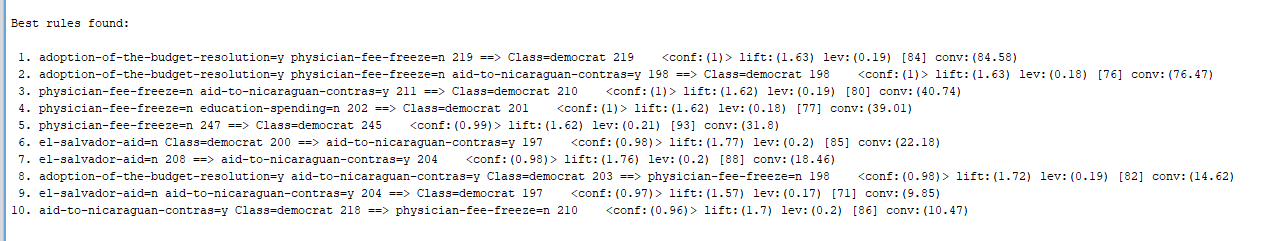

### The final step is to explain the results and algorithm
Let us explain the **parameters in this algorithm** first:
* car: If true, it will mine class association rules rather than global association rules.
* classindex: If set to -1, the last attribute will be treated as a target.
* delta: Continue to reduce the support until the minimum support is reached or a rule that meets the quantity requirements is generated.
* lowerBoundMinSupport: The lower bound of the minimum support.
* metricType: Set the metric for sorting the rules. It can be: confidence, lift, leverage, and conviction. (class association rules can only be mined with confidence.)
* minMtric: The minimum value of the metric.
* numRules: The number of rules to be discovered.
* outputItemSets: If set to true, itemsets will be shown in the result.
* removeAllMissingCols: removes all columns with missing values.
* significanceLevel: only for confidence level
* upperBoundMinSupport: The upper bound of the minimum support. From this value, iteratively reduce the minimum support.
* verbose: If set to true, the algorithm will run in redundant mode.

**Then, explain the terms support, confidence, lift and leverage:**
* **support**: is the proportion of the examples covered by the premise that are also covered by the consequent. That is, the number of times the item set appears in the record, divided by the number of all records in the data set.
* **confidence**: The confidence of the rule {A->B} is the number of times A and B appear at the same time, divided by the number of times A appears. That is, under the condition that A occurs, the probability of B occurrence.
* **lift**: is determined by dividing the confidence by the support. In the rule {A->B}, lift refers to the confidence of {A->B}, divided by the support of B.
* **leverage**: is the proportion of additional examples covered by both the premise and the consequent beyond those expected if the premise and consequent were statistically independent.<br />
For more information, please read [The WEKA Workbench](https://www.cs.waikato.ac.nz/ml/weka/Witten_et_al_2016_appendix.pdf)

The Minimum support here is 0.45 and Minimum metric <confidence> is 0.9. Besides, it iterated (1.0(lowerBoundMinSupport) - 0.45(Minimum support)) / 0.05 = 11 times.

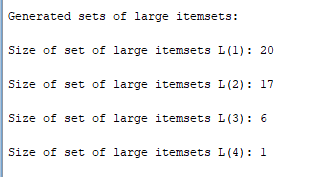 
The generated frequent itemsets L(1) set contains 20 instances, and the frequent itemsets L(2) set contains 17 instances, frequent itemsets L(3) contain 6 instances, and frequent itemsets L(4) contain only 1 instance.
    
Again, the **top 10 best rules** found here are:
 1. adoption-of-the-budget-resolution=y physician-fee-freeze=n 219 ==> Class=democrat 219    <conf:(1)> lift:(1.63) lev:(0.19) [84] conv:(84.58)
 2. adoption-of-the-budget-resolution=y physician-fee-freeze=n aid-to-nicaraguan-contras=y 198 ==> Class=democrat 198    <conf:(1)> lift:(1.63) lev:(0.18) [76] conv:(76.47)
 3. physician-fee-freeze=n aid-to-nicaraguan-contras=y 211 ==> Class=democrat 210    <conf:(1)> lift:(1.62) lev:(0.19) [80] conv:(40.74)
 4. physician-fee-freeze=n education-spending=n 202 ==> Class=democrat 201    <conf:(1)> lift:(1.62) lev:(0.18) [77] conv:(39.01)
 5. physician-fee-freeze=n 247 ==> Class=democrat 245    <conf:(0.99)> lift:(1.62) lev:(0.21) [93] conv:(31.8)
 6. el-salvador-aid=n Class=democrat 200 ==> aid-to-nicaraguan-contras=y 197    <conf:(0.98)> lift:(1.77) lev:(0.2) [85] conv:(22.18)
 7. el-salvador-aid=n 208 ==> aid-to-nicaraguan-contras=y 204    <conf:(0.98)> lift:(1.76) lev:(0.2) [88] conv:(18.46)
 8. adoption-of-the-budget-resolution=y aid-to-nicaraguan-contras=y Class=democrat 203 ==> physician-fee-freeze=n 198    <conf:(0.98)> lift:(1.72) lev:(0.19) [82] conv:(14.62)
 9. el-salvador-aid=n aid-to-nicaraguan-contras=y 204 ==> Class=democrat 197    <conf:(0.97)> lift:(1.57) lev:(0.17) [71] conv:(9.85)
 10. aid-to-nicaraguan-contras=y Class=democrat 218 ==> physician-fee-freeze=n 210    <conf:(0.96)> lift:(1.7) lev:(0.2) [86] conv:(10.47)
    
There are not only Confidence methods for evaluating Ranking Rules, but also Lift, Leverage and Conviction.
* According to the first rule, it can be seen that those who support adoption-of-the-budget-resolution and oppose physician-fee-freez are Democrats. The confidence reached 1, the Lift value reached 1.63, and the Leverage value reached 0.19. Besides,  the best Rule has been confirmed by 219 data. '<>' means to get the result according to the measurement inside. The four values mentioned above, the larger the value, the greater the correlation between the condition and the result.

We can analyze the rule 2, 3, 4, 5 and 9 in the same way.
    
* According to the 6th rule, it can be seen that those who are in democrat oppose el-salvador-aid  are support aid-to-nicaraguan-contra. The confidence reached 0.98(197 / 200), the Lift value reached 1.63, and the Leverage value reached 0.19. Besides,  the 6th Rule has been confirmed by197 data.
    
We can analyze the rule 6, 7, 8 and 10 in the same way.
    
In conclusion, we can see that democrat trends to support adoption-of-the-budget-resolution and aid-to-nicaraguan-contras, while oppose physician-fee-freeze, education-spending and el-salvador-aid.

## Q2.2 (1 mark)

It is interesting to see that none of the rules in the default output involve `class = republican`. Why do you think that is?

## Q2.2 Answer

Again, we can see the relationship between each label and class(democrat and republican)
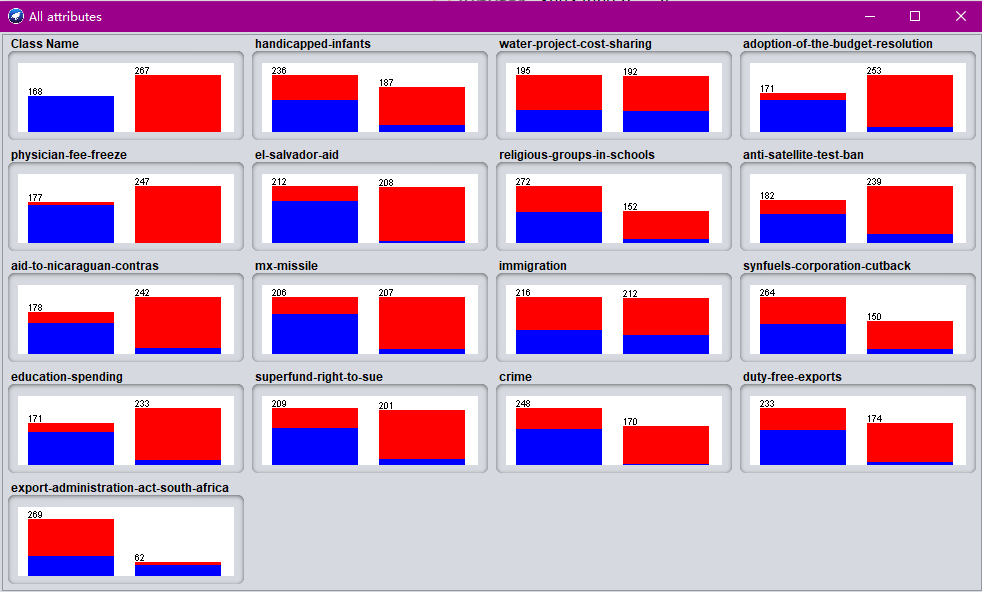
Blue stands for democrat and red stands for republican. In several features, blue occupies almost 100%(Do not consider the black part, the black part has no class) of the y or n options(14 of 16), while red is more balanced. 

In the graph below, black represents one option on a particular feature dominated by Democrats, while green represents one option on a particular feature dominated by republican. 
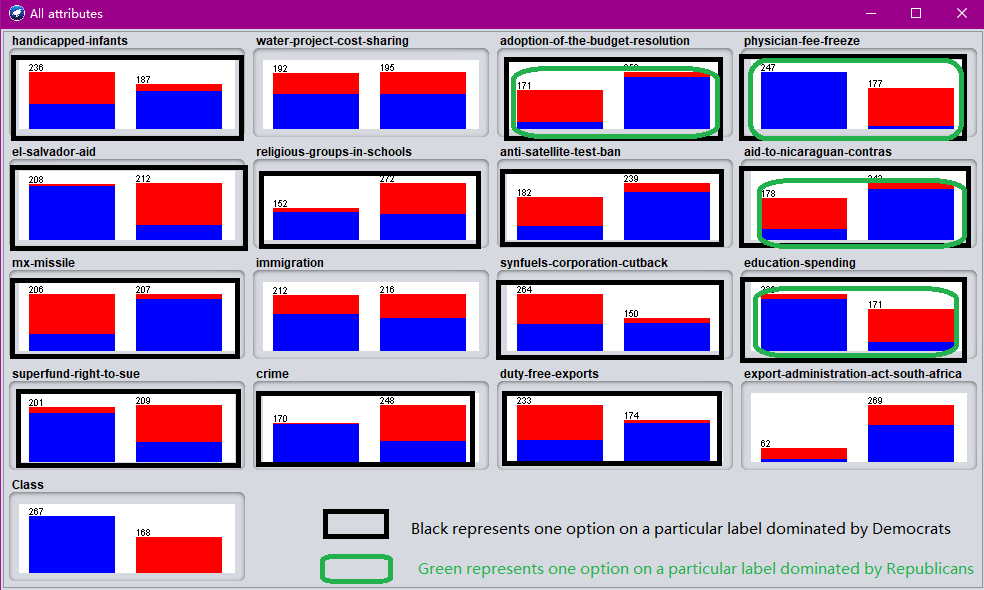
<br>
For each attribute, when associated with Class = republican, it must also be associated with a democrat, and the degree of democrat dominance must be higher (you can see the proportion of the blue part in the entire bar.) The opposite is not true.


In the Apriori algorithm, support is mainly used to perform correlation analysis on each item set. If an item set is infrequent, then all its supersets are also infrequent. The item set containing class = democrat appears very frequently, so class = democrat is also appears very frequently. Besides, the amount of democrat is 267 > 196 (**The instance in minimum support**), and the amount of republican is 168 < 196 (**The instance in minimum support**). Therefore, the support of democrat is bigger than the support of republican, and the class = republican is inherently low. Therefore, This result is very reasonable.